<a href="https://colab.research.google.com/github/umeshrawat/MachineLearning/blob/master/Unsupervised_Classification/SocialClusters/src/SocialClusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#Open the code repo

!git clone https://github.com/umeshrawat/MachineLearning.git

fatal: destination path 'MachineLearning' already exists and is not an empty directory.


In [12]:
root_folder_path = '/content/MachineLearning/Unsupervised_Classification/SocialClusters/Dataset/facebook_combined.txt'

In [13]:
!pip install python-igraph

In [14]:
import networkx as nx

nx_graph = nx.read_edgelist(root_folder_path, create_using = nx.Graph(), nodetype = int)

In [24]:
import pandas as pd

print(nx_graph)
# Calculate degree centrality
degree_centrality = nx.degree_centrality(nx_graph)
#print(type(degree_centrality))
centrality_df = pd.DataFrame(degree_centrality, index = list(degree_centrality.keys()))
pd.set_option('display.max_columns', None)
print(centrality_df)

Streaming output truncated to the last 5000 lines.
...        ...      ...       ...       ...       ...       ...       ...   
4034  0.011392  0.00421  0.024517  0.013373  0.012135  0.026498  0.001981   
4035  0.011392  0.00421  0.024517  0.013373  0.012135  0.026498  0.001981   
4036  0.011392  0.00421  0.024517  0.013373  0.012135  0.026498  0.001981   
4037  0.011392  0.00421  0.024517  0.013373  0.012135  0.026498  0.001981   
4038  0.011392  0.00421  0.024517  0.013373  0.012135  0.026498  0.001981   

          1866      1867      1868      1869      1870      1871      1872  \
0     0.007677  0.030461  0.029965  0.003715  0.005696  0.020307  0.012382   
1     0.007677  0.030461  0.029965  0.003715  0.005696  0.020307  0.012382   
2     0.007677  0.030461  0.029965  0.003715  0.005696  0.020307  0.012382   
3     0.007677  0.030461  0.029965  0.003715  0.005696  0.020307  0.012382   
4     0.007677  0.030461  0.029965  0.003715  0.005696  0.020307  0.012382   
...        ...    

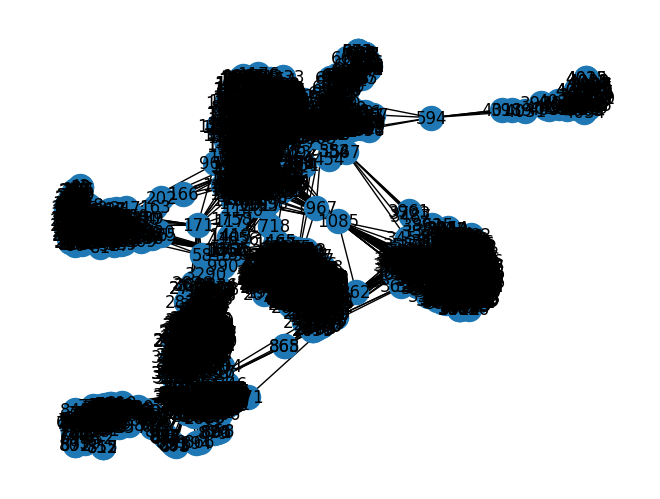

In [ ]:
import matplotlib.pyplot as plt
nx.draw(nx_graph, with_labels=True)
plt.show()